In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

In [7]:
suffix = '' #4000, 1000,50, m4000

nami = pd.read_json('nami/pois'+suffix)

ewave = pd.read_csv('easywave/eWave.poi'+suffix+'.ssh', delim_whitespace=True)

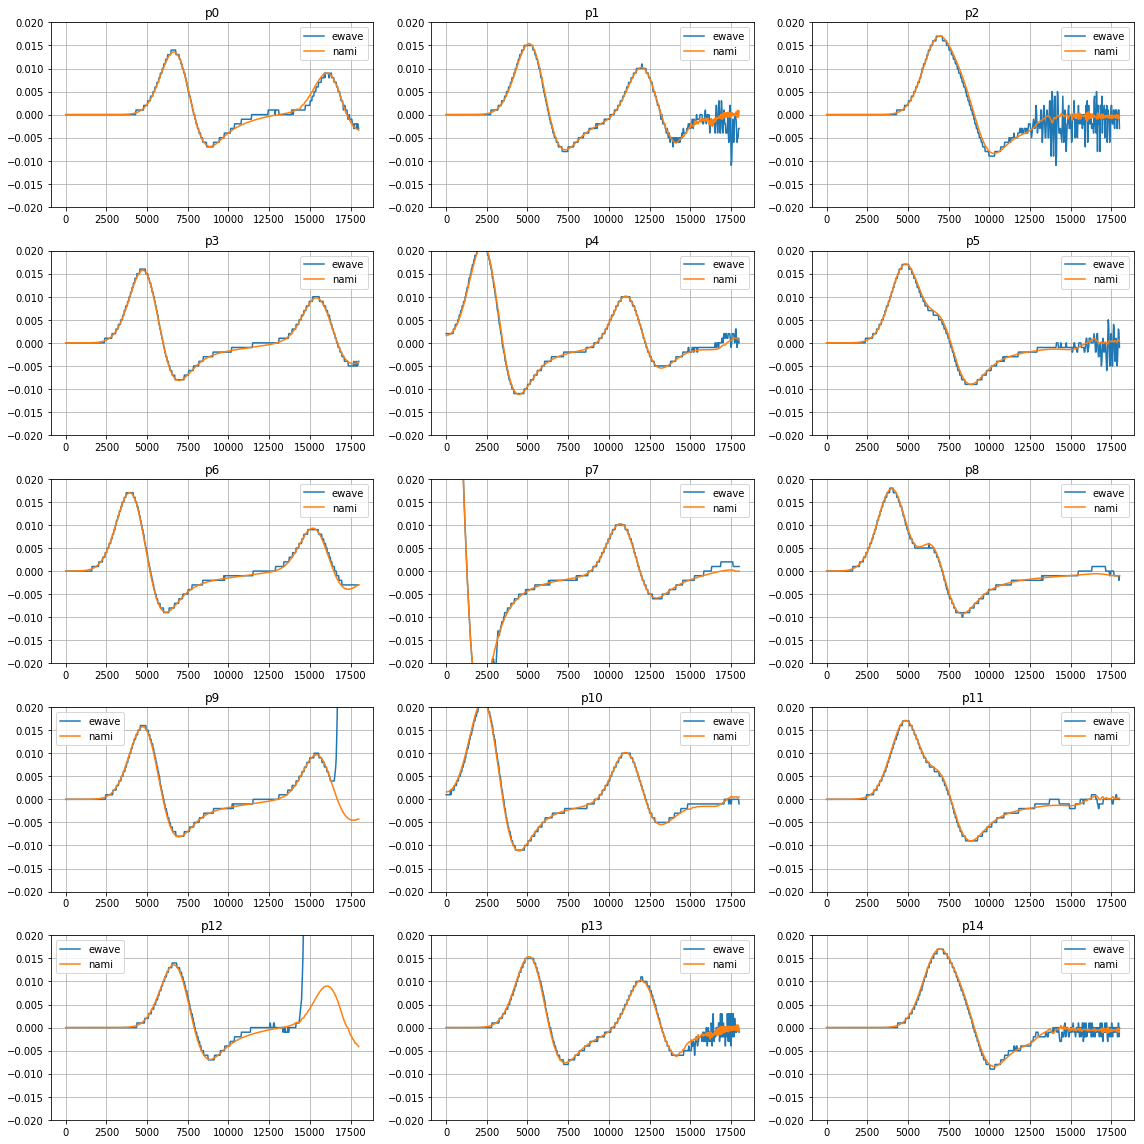

In [8]:
f = plt.figure(figsize=(8*2,8*2))

for n in range(15):
    ax = f.add_subplot(5,3,n+1)
    key = 'p'+str(n)
    plt.plot(ewave['Minute']*60, ewave[key], label='ewave')
    plt.plot(nami[key].time, nami[key].surface, label='nami')
#     if(ewave[key].max()>0.02):
    plt.ylim(-0.02,0.02)
    plt.grid('on')
    plt.legend(loc=0)
    plt.title(key)
    plt.tight_layout()

ideas

* modificar easywave para comparar la malla completa en un frame
* comparar con código escrito en python!
* revisar código de nami para ver que está corriendo el modelo correcto
* revisar código de easywave para ver que está exportando bien




In [57]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [58]:
import time

In [59]:
ls nami

 pois          'tlab2D (17)'  'tlab2D (3)'   'tlab2D (42)'  'tlab2D (55)'
 pois1000      'tlab2D (18)'  'tlab2D (30)'  'tlab2D (43)'  'tlab2D (56)'
 pois4000      'tlab2D (19)'  'tlab2D (31)'  'tlab2D (44)'  'tlab2D (57)'
 pois50        'tlab2D (2)'   'tlab2D (32)'  'tlab2D (45)'  'tlab2D (58)'
 poism4000     'tlab2D (20)'  'tlab2D (33)'  'tlab2D (46)'  'tlab2D (59)'
 tlab2D        'tlab2D (21)'  'tlab2D (34)'  'tlab2D (47)'  'tlab2D (6)'
'tlab2D (1)'   'tlab2D (22)'  'tlab2D (35)'  'tlab2D (48)'  'tlab2D (60)'
'tlab2D (10)'  'tlab2D (23)'  'tlab2D (36)'  'tlab2D (49)'  'tlab2D (7)'
'tlab2D (11)'  'tlab2D (24)'  'tlab2D (37)'  'tlab2D (5)'   'tlab2D (8)'
'tlab2D (12)'  'tlab2D (25)'  'tlab2D (38)'  'tlab2D (50)'  'tlab2D (9)'
'tlab2D (13)'  'tlab2D (26)'  'tlab2D (39)'  'tlab2D (51)'
'tlab2D (14)'  'tlab2D (27)'  'tlab2D (4)'   'tlab2D (52)'
'tlab2D (15)'  'tlab2D (28)'  'tlab2D (40)'  'tlab2D (53)'
'tlab2D (16)'  'tlab2D (29)'  'tlab2D (41)'  'tlab2D (54)'


(0.0, 501.0, 0.0, 501.0)

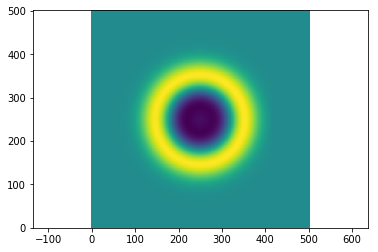

In [61]:
nami0 = np.loadtxt('nami/tlab2D (10)',delimiter=',', skiprows=1).reshape((501,501))

plt.pcolormesh(nami0)
plt.axis('equal')

In [62]:
11000%300

200

In [63]:
'%03d'%5

'005'

In [64]:
plt.gcf().get_size_inches()

array([6., 4.])

<Figure size 432x288 with 0 Axes>

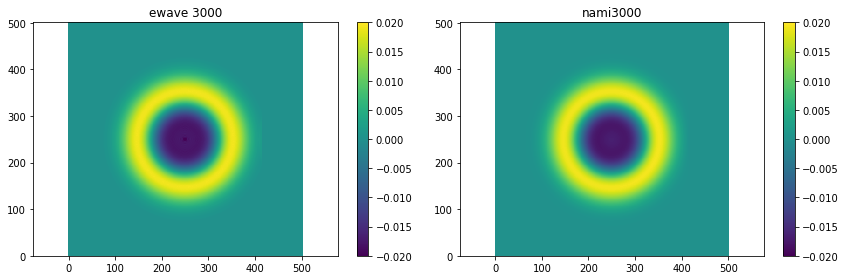

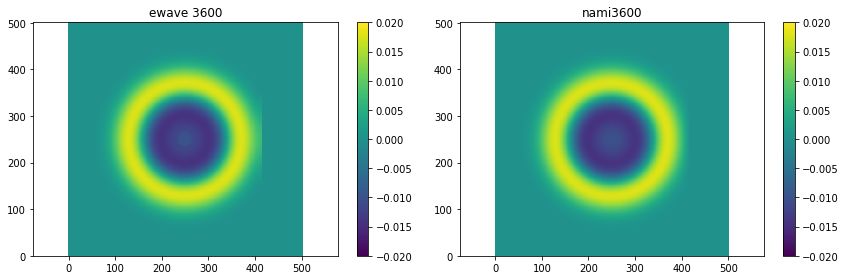

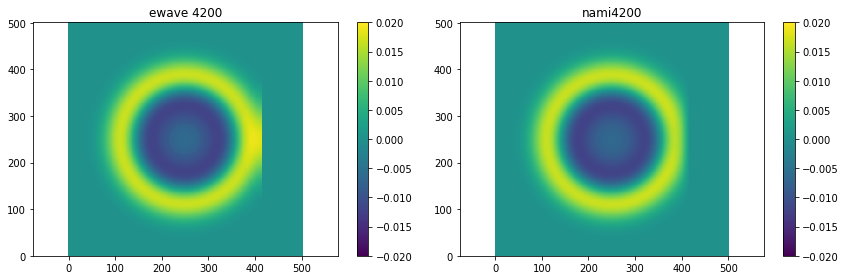

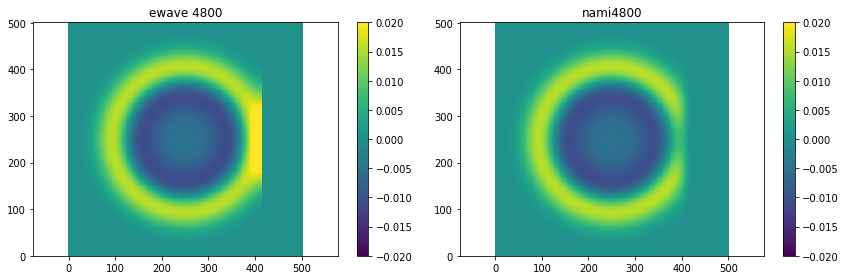

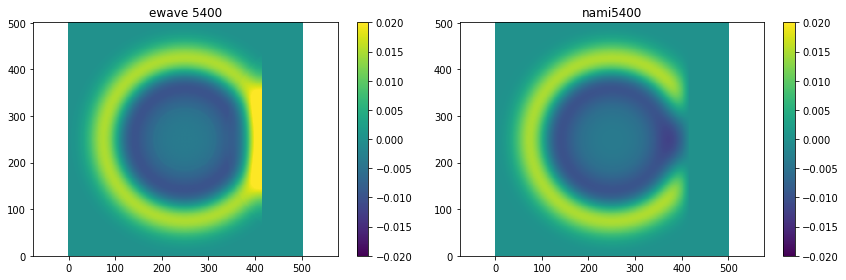

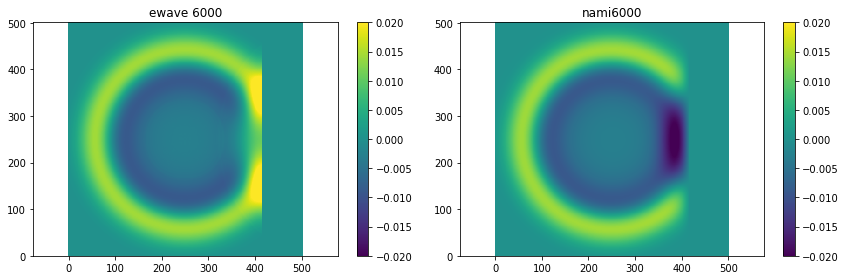

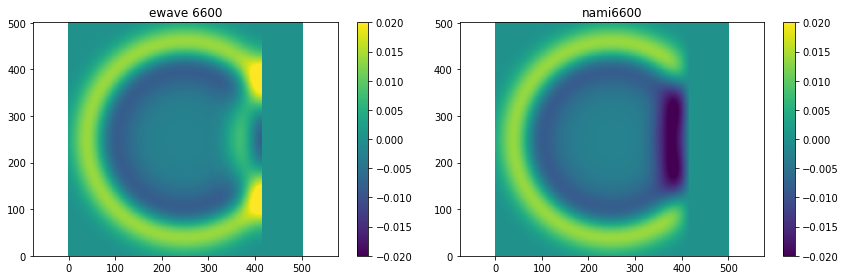

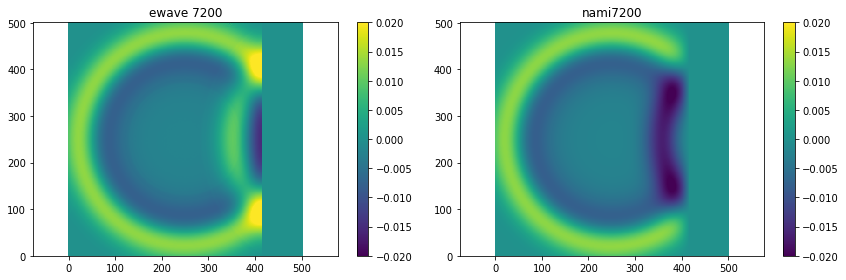

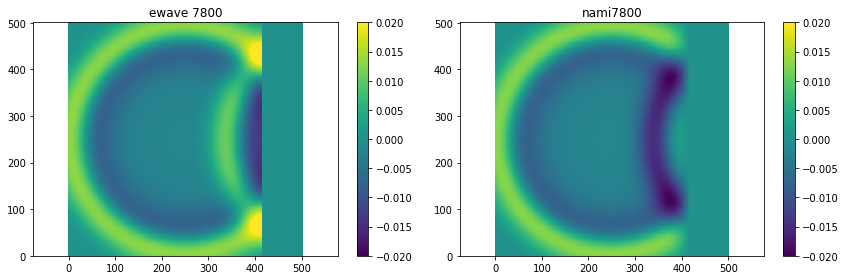

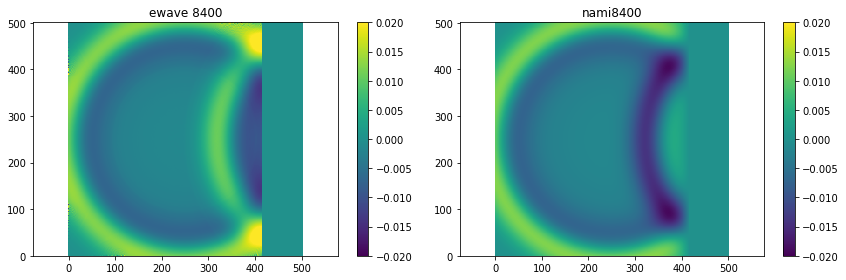

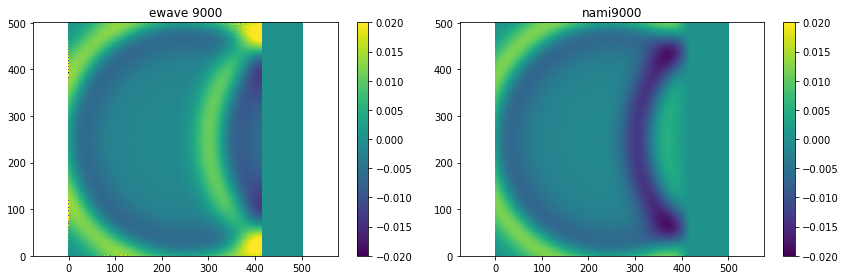

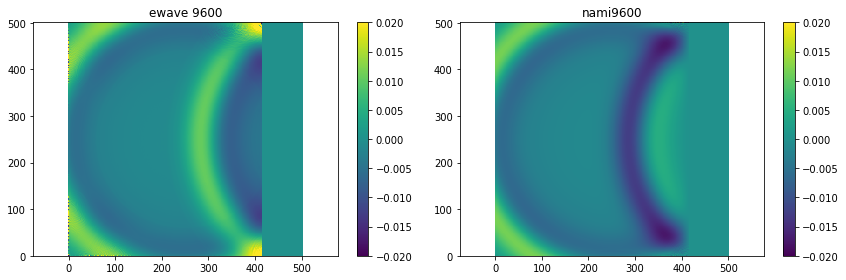

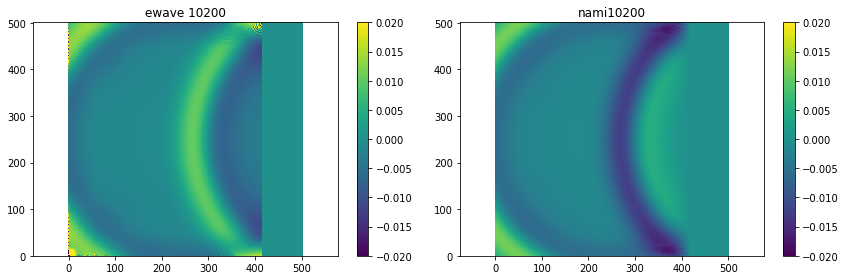

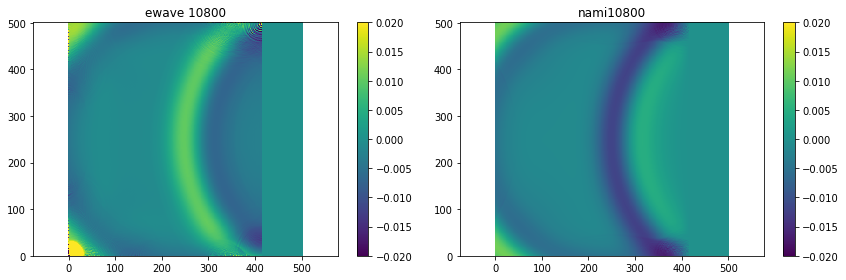

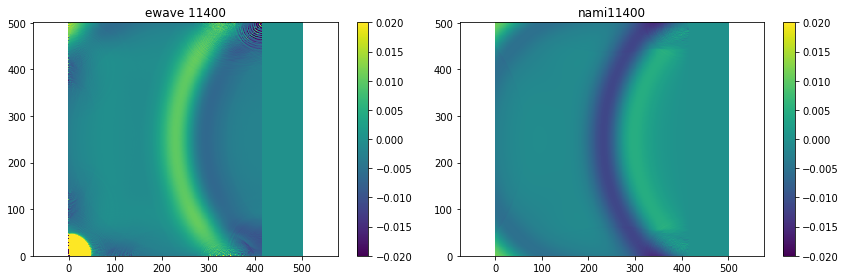

In [70]:
for i in range(10,40,2):
    plt.figure(figsize=(6*2,2*2))
    plt.subplot(121)
    lon, lat, h = ew2py('easywave/eWave.2D.%05d.ssh'%(i*300))
    plt.pcolormesh(h, vmax=0.02,vmin=-0.02)
    plt.colorbar()
    plt.axis('equal')
    plt.title('ewave %i'%(i*300))
    plt.subplot(122)
    lon, lat, h = ew2py('easywave/eWave.2D.%05d.ssh'%(i*300))
    nami0 = np.loadtxt('nami/tlab2D (%i)'%i,delimiter=',', skiprows=1).reshape((501,501))
    plt.pcolormesh(nami0, vmax=0.02,vmin=-0.02)
    plt.colorbar()
    plt.axis('equal')
    plt.title('nami%i'%(i*300))
    plt.tight_layout()